In [1]:
import math
import numpy as np
import pandas as pd
import random
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def fct(x):
    return math.factorial(x)

In [3]:
def C(n, k): 
    return fct(n) // (fct(n - k) * fct(k))

In [4]:
class Dice:
    definition_format = re.compile('[1-9][0-9]*d[1-9][0-9]*')
    
    @classmethod
    def _parse_definition(cls, definition):
        if not cls.definition_format.match(definition):
            raise ValueError
        dice_params = definition.split('d')
        dice_pool = int(dice_params[0])
        dice_side = int(dice_params[1])
        
        return dice_pool, dice_side
    
    def __init__(self, definition=None):
        if definition is not None:
            self.dice_pool, self.dice_side = self._parse_definition(definition)
    
    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        pass
    
    @staticmethod
    def roll(dice_pool, dice_side):
            
        return np.random.randint(1, high=dice_side + 1, size=dice_pool)
    
    def __call__(self, definition=None):
        if definition is not None:
            dice_pool, dice_side = self._parse_definition(definition)
        else:
            dice_pool, dice_side = self.dice_pool, self.dice_side
        return self.roll(dice_pool, dice_side)
    

In [5]:
with Dice() as roll:
    display(roll('2d6'))

array([6, 6])

In [6]:
with Dice('2d6') as roll:
    display(roll())

array([1, 3])

In [7]:
# Dice.roll('2d6')

In [8]:
class d:
    class Roll:
        def __init__(self, result: np.ndarray):
            if not isinstance(result, np.ndarray) or len(result.shape) > 2:
                raise TypeError
            self.result = result
            if len(result.shape) == 1:
                self.len = len(result)
            else:
                self.len = result.shape[0]
            
        @property
        def shape(self):
            return self.result.shape
        
        def __len__(self):
            if len(result.shape) == 1:
                return self.len(self.len)
            else:
                return TypeError
            
        def __repr__(self):
            return str(self.result)
        
        def __add__(self, other: int):
            if isinstance(other, int):
                return self.__class__(self.result + np.array([other]))
            elif isinstance(other, self.__class__):
                if len(self.result.shape) != len(other.result.shape):
                    raise ValueError
                if len(self.result.shape) <= 2:
                    return self.__class__(np.concatenate([self.result, other.result]))
                else:
                    raise ValueError
            else:
                return NotImplemented
            
        def __eq__(self, other: int):
            # Raise error for 2d arrays
            return self.result == other

        def __gt__(self, other: int):
            return self.result > other

        def __ge__(self, other: int):
            return self.result >= other

        def __lt__(self, other: int):
            return self.result < other

        def __le__(self, other: int):
            return self.result <= other
        
        def __max__(self):
            return self.result.max()
        
        def sum(self):
            if len(self.result.shape) == 1:
                return self.result.sum()
            elif len(self.result.shape) == 2:
                return self.result.sum(axis=0)
        
    def _roll(self, n=1, k=1):
        return np.random.randint(1, high=self.sides + 1, size=(k, n))
    
    def __init__(self, sides: int):
        self.sides = sides
        
    def __len__(self):
        return self.sides
        
    def __max__(self):
        return self.sides
    
    def __min__(self):
        return 1
        
    def __rmul__(self, other):
        if isinstance(other, int):
            return self.__class__.Roll(np.array(self._roll(n=other)[0]))
        elif isinstance(other, tuple):
            return self.__class__.Roll(np.matrix(self._roll(n=other[0], k=other[1])))
        else:
            return NotImplemented

    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        pass
    
    def __repr__(self):
        return f'd{self.sides}'
    



In [9]:
with d(6) as d6:
    display(d6._roll())
    display(4*d6)
    display(4*d6 + 2)
    assert 1 <= 1*d6 <= 6
    assert 3 <= 1*d6 + 2 <= 8
    display(4*d6 == 6)
    assert (4*d6 <= 24).all()
    display(4*d6 >= 3)
    display((2, 4)*d6)
with d(20) as d20:
    display(2*d20)
with d(4) as d4, d(6) as d6:
    display(1*d6 + 2*d4)
    assert (1*d6 + 2*d4).sum() <= 14
    display(((3, 1)*d6 + (3, 2)*d4))
    display((((3, 1)*d6 + (3, 2)*d4)).sum())
    assert ((((3, 1)*d6 + (3, 2)*d4)).sum() <= 14).all()
    

array([[2]])

[2 3 6 5]

[4 6 7 8]

array([False, False, False, False])

array([False,  True, False, False])

[[1 4]
 [1 2]
 [6 1]
 [4 4]]

[ 3 13]

[5 4 2]

[[5 3 1]
 [1 3 1]
 [1 1 2]]

matrix([[ 4, 10,  8]])

In [133]:
1*d6 + 2*d4

[1 3 3]

In [134]:
1*d6

[4]

In [135]:
1*d6 + 0

[6]

In [136]:
1*d6 + 1

[3]

In [37]:
def meaningful_range(x):
    lower = x[x > 0.9].index.max()
    upper = x[x < 0.1].index.min()
    maximum = x[x <= .0001].index.min() - 1
    return f'{upper - lower} ({lower} - {upper}) max: {maximum}'

In [137]:
def P(probability_definition):
    j, cutoff, dp, d = (int(value) for value in re.findall(r'\d+', probability_definition))
    p = (d - cutoff + 1) / d
    return p**(dp-j) * (1-p)**j * C(dp, j)
P('exactly 1 roll >= 6 with 2d6'), 10 / 36

(0.2777777777777778, 0.2777777777777778)

In [11]:
# Probability of rolling at least `difficulty` (x) number of dice greater than or equal to `cutoff` with `dp` (y) number of rolls.
max_dice_pool = 9
sides = 6
cutoff = 6

p = (sides - cutoff + 1) / sides

M = np.zeros((max_dice_pool, max_dice_pool))

for dp in range(1, max_dice_pool + 1):
    for difficulty in range(1, dp + 1):
        combination_count = math.ceil(difficulty / 2)
        pʹ = 0
        for j in range(dp - difficulty + 1):
            pʹ += p**(dp-j) * (1-p)**j * C(dp, j)
#         print(dp, difficulty)
#         print([p**(dp-j) * (1-p)**j for j in range(dp - difficulty + 1)])
#         print([C(dp, j) for j in range(dp - difficulty + 1)])
        M[dp - 1, difficulty - 1] = pʹ
M.round(3)

array([[0.167, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.306, 0.028, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.421, 0.074, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.518, 0.132, 0.016, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.598, 0.196, 0.035, 0.003, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.665, 0.263, 0.062, 0.009, 0.001, 0.   , 0.   , 0.   , 0.   ],
       [0.721, 0.33 , 0.096, 0.018, 0.002, 0.   , 0.   , 0.   , 0.   ],
       [0.767, 0.395, 0.135, 0.031, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.806, 0.457, 0.178, 0.048, 0.009, 0.001, 0.   , 0.   , 0.   ]])

In [12]:
# Probability of rolling at least `difficulty` (x) number of dice greater than or equal to `cutoff` with `dp` (y) number of rolls.
max_dice_pool = 5
sides = 4
cutoff = 4

p = (sides - cutoff + 1) / sides

M = np.zeros((max_dice_pool, max_dice_pool))

for dp in range(1, max_dice_pool + 1):
    for difficulty in range(1, dp + 1):
        combination_count = math.ceil(difficulty / 2)
        pʹ = 0
        for j in range(dp - difficulty + 1):
            pʹ += p**(dp-j) * (1-p)**j * C(dp, j)
#         print(dp, difficulty)
#         print([p**(dp-j) * (1-p)**j for j in range(dp - difficulty + 1)])
#         print([C(dp, j) for j in range(dp - difficulty + 1)])
        M[dp - 1, difficulty - 1] = pʹ
M.round(3)

array([[0.25 , 0.   , 0.   , 0.   , 0.   ],
       [0.438, 0.062, 0.   , 0.   , 0.   ],
       [0.578, 0.156, 0.016, 0.   , 0.   ],
       [0.684, 0.262, 0.051, 0.004, 0.   ],
       [0.763, 0.367, 0.104, 0.016, 0.001]])

In [13]:
1 - (1 - .132)**5

0.5072817757624319

In [14]:
# Probability of rolling over the difficulty class with a d20 and a bonus.
sides = 20
max_bonus = 15
dc_multiplier = 5
max_dl = 35 // dc_multiplier

M = np.zeros((max_bonus, max_dl))

for bonus in range(max_bonus):
    for dl in range(max_dl):
        dc = (dl + 1) * dc_multiplier
        p = (sides - dc + bonus) / sides
        pʹ = 1. if p > 1 else p
        pʹ = 1 / sides if pʹ < 0 else pʹ
        M[bonus, dl] = pʹ
M.round(3)

array([[0.75, 0.5 , 0.25, 0.  , 0.05, 0.05, 0.05],
       [0.8 , 0.55, 0.3 , 0.05, 0.05, 0.05, 0.05],
       [0.85, 0.6 , 0.35, 0.1 , 0.05, 0.05, 0.05],
       [0.9 , 0.65, 0.4 , 0.15, 0.05, 0.05, 0.05],
       [0.95, 0.7 , 0.45, 0.2 , 0.05, 0.05, 0.05],
       [1.  , 0.75, 0.5 , 0.25, 0.  , 0.05, 0.05],
       [1.  , 0.8 , 0.55, 0.3 , 0.05, 0.05, 0.05],
       [1.  , 0.85, 0.6 , 0.35, 0.1 , 0.05, 0.05],
       [1.  , 0.9 , 0.65, 0.4 , 0.15, 0.05, 0.05],
       [1.  , 0.95, 0.7 , 0.45, 0.2 , 0.05, 0.05],
       [1.  , 1.  , 0.75, 0.5 , 0.25, 0.  , 0.05],
       [1.  , 1.  , 0.8 , 0.55, 0.3 , 0.05, 0.05],
       [1.  , 1.  , 0.85, 0.6 , 0.35, 0.1 , 0.05],
       [1.  , 1.  , 0.9 , 0.65, 0.4 , 0.15, 0.05],
       [1.  , 1.  , 0.95, 0.7 , 0.45, 0.2 , 0.05]])

In [15]:
# Probability of rolling in total greater than `difficulty`
sides = 6
dp = 2
bonus = 0
difficulty = 12

pʹ = 0
for r in range(difficulty - bonus, sides * dp + 1):
    p = sum([(-1)**k * C(dp, k) * C(r - sides * k - 1, dp - 1) for k in range((r-dp)//sides + 1)])/(sides**dp)
    pʹ += p
pʹ

0.027777777777777776

## 3d6 Analysis

In [16]:
sides = 6
dp = 3
max_bonus = 20

M = np.zeros((max_bonus + 1, dp * sides + 1 + max_bonus))

for difficulty in range(dp, dp * sides + 1 + max_bonus):
    for bonus in range(max_bonus + 1):
        pʹ = 0
        for r in range(difficulty - bonus, dp * sides + 1):
            p = sum([(-1)**k * C(dp, k) * C(r - sides * k - 1, dp - 1) for k in range((r-dp)//sides + 1)])/(sides**dp)
            pʹ += p
        M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1.0,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.0,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.0,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.0,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.0,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,1.0,1.000,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,1.0,1.000,1.000,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.995,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
# Role of chance
sides = 6
dp = 3
max_bonus = 20

M = np.zeros((max_bonus + 1, dp * sides + 1 + max_bonus))

for difficulty in range(dp, dp * sides + 1 + max_bonus):
    for bonus in range(max_bonus + 1):
        part_left_to_chance = difficulty - (bonus + dp) if (bonus + dp) < difficulty else 0
        M[bonus, difficulty] = part_left_to_chance / (bonus + dp + part_left_to_chance)
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.0,0.25,0.4,0.500,0.571,0.625,0.667,0.7,0.727,0.750,0.769,0.786,0.800,0.812,0.824,0.833,0.842,0.85,0.857,0.864,0.870,0.875,0.88,0.885,0.889,0.893,0.897,0.900,0.903,0.906,0.909,0.912,0.914,0.917,0.919,0.921
1,0.0,0.00,0.2,0.333,0.429,0.500,0.556,0.6,0.636,0.667,0.692,0.714,0.733,0.750,0.765,0.778,0.789,0.80,0.810,0.818,0.826,0.833,0.84,0.846,0.852,0.857,0.862,0.867,0.871,0.875,0.879,0.882,0.886,0.889,0.892,0.895
2,0.0,0.00,0.0,0.167,0.286,0.375,0.444,0.5,0.545,0.583,0.615,0.643,0.667,0.688,0.706,0.722,0.737,0.75,0.762,0.773,0.783,0.792,0.80,0.808,0.815,0.821,0.828,0.833,0.839,0.844,0.848,0.853,0.857,0.861,0.865,0.868
3,0.0,0.00,0.0,0.000,0.143,0.250,0.333,0.4,0.455,0.500,0.538,0.571,0.600,0.625,0.647,0.667,0.684,0.70,0.714,0.727,0.739,0.750,0.76,0.769,0.778,0.786,0.793,0.800,0.806,0.812,0.818,0.824,0.829,0.833,0.838,0.842
4,0.0,0.00,0.0,0.000,0.000,0.125,0.222,0.3,0.364,0.417,0.462,0.500,0.533,0.562,0.588,0.611,0.632,0.65,0.667,0.682,0.696,0.708,0.72,0.731,0.741,0.750,0.759,0.767,0.774,0.781,0.788,0.794,0.800,0.806,0.811,0.816
5,0.0,0.00,0.0,0.000,0.000,0.000,0.111,0.2,0.273,0.333,0.385,0.429,0.467,0.500,0.529,0.556,0.579,0.60,0.619,0.636,0.652,0.667,0.68,0.692,0.704,0.714,0.724,0.733,0.742,0.750,0.758,0.765,0.771,0.778,0.784,0.789
6,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.1,0.182,0.250,0.308,0.357,0.400,0.438,0.471,0.500,0.526,0.55,0.571,0.591,0.609,0.625,0.64,0.654,0.667,0.679,0.690,0.700,0.710,0.719,0.727,0.735,0.743,0.750,0.757,0.763
7,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.091,0.167,0.231,0.286,0.333,0.375,0.412,0.444,0.474,0.50,0.524,0.545,0.565,0.583,0.60,0.615,0.630,0.643,0.655,0.667,0.677,0.688,0.697,0.706,0.714,0.722,0.730,0.737
8,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.083,0.154,0.214,0.267,0.312,0.353,0.389,0.421,0.45,0.476,0.500,0.522,0.542,0.56,0.577,0.593,0.607,0.621,0.633,0.645,0.656,0.667,0.676,0.686,0.694,0.703,0.711
9,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.077,0.143,0.200,0.250,0.294,0.333,0.368,0.40,0.429,0.455,0.478,0.500,0.52,0.538,0.556,0.571,0.586,0.600,0.613,0.625,0.636,0.647,0.657,0.667,0.676,0.684


In [18]:
# Advantage
dp = 4
drop = 1
max_bonus = 20
k = 10000

M = np.zeros((max_bonus + 1, (dp - drop) * 6 + 1 + max_bonus))


with d(6) as d6:
    for difficulty in range(dp, (dp - drop) * 6 + 1 + max_bonus):
        for bonus in range(max_bonus + 1):
            R = (k, dp)*d6
            R.sort(axis=0)
            wins = (R[drop:].sum(axis=0) + bonus >= difficulty).sum().sum()
            pʹ = wins / k
            M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.999,0.996,0.989,0.971,0.946,0.896,0.826,0.736,0.627,0.482,0.365,0.232,0.130,0.060,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,0.999,0.996,0.990,0.971,0.939,0.893,0.821,0.726,0.610,0.483,0.348,0.237,0.131,0.062,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.000,1.000,1.000,0.996,0.988,0.970,0.940,0.892,0.824,0.734,0.617,0.490,0.354,0.237,0.131,0.060,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.000,1.000,1.000,1.000,0.998,0.988,0.972,0.944,0.893,0.828,0.732,0.615,0.495,0.351,0.229,0.126,0.061,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.000,1.000,1.000,1.000,1.000,0.996,0.990,0.973,0.943,0.893,0.819,0.736,0.622,0.483,0.358,0.235,0.138,0.060,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,1.000,1.000,1.000,1.000,1.000,0.999,0.995,0.987,0.971,0.944,0.892,0.824,0.733,0.613,0.492,0.348,0.226,0.132,0.058,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.988,0.972,0.943,0.898,0.822,0.725,0.625,0.482,0.355,0.239,0.127,0.059,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.996,0.989,0.969,0.945,0.892,0.827,0.720,0.623,0.485,0.351,0.231,0.125,0.056,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.989,0.974,0.943,0.893,0.828,0.720,0.611,0.491,0.365,0.226,0.129,0.054,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.995,0.989,0.972,0.945,0.894,0.819,0.731,0.620,0.494,0.353,0.229,0.128,0.058,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [19]:
# Advantage - probability of 2 and 3 1's & 6's
dp = 4
drop = 1
k = 10000

M = np.zeros((max_bonus + 1, (dp - drop) * 6 + 1))


with d(6) as d6:
    R = (k, dp)*d6
    R.sort(axis=0)
    miracles = ((R[drop:] == 6).sum(axis=0) == 3).sum()
    fortunes = ((R[drop:] == 6).sum(axis=0) == 2).sum()
    misfortunes = ((R[drop:] == 1).sum(axis=0) == 2).sum()
    disasters = (R[drop:].sum(axis=0) == 3).sum().sum()
    pʹʹʹ = disasters / k
miracles / k, fortunes / k, misfortunes / k, disasters / k

(0.0153, 0.113, 0.016, 0.0005)

In [20]:
# Disadvantage - probability of 2 and 3 1's & 6's
dp = 4
drop = 1
k = 10000

M = np.zeros((max_bonus + 1, (dp - drop) * 6 + 1))


with d(6) as d6:
    R = (k, dp)*d6
    R.sort(axis=0)
    miracles = ((R[:-drop] == 6).sum(axis=0) == 3).sum()
    fortunes = ((R[:-drop] == 6).sum(axis=0) == 2).sum()
    misfortunes = ((R[:-drop] == 1).sum(axis=0) == 2).sum()
    disasters = (R[:-drop].sum(axis=0) == 3).sum().sum()
    pʹʹʹ = disasters / k
miracles / k, fortunes / k, misfortunes / k, disasters / k

(0.0012, 0.0144, 0.1198, 0.0169)

In [21]:
side = 20
dp = 1
max_bonus = 2 * side * dp // 3

M = np.zeros((max_bonus + 1, dp * side + 1))

for difficulty in range(dp, dp * side + 1):
    for bonus in range(max_bonus + 1):
        pʹ = 0
        for r in range(difficulty - bonus, side * dp + 1):
            p = sum([(-1)**k * C(dp, k) * C(r - side * k - 1, dp - 1) for k in range((r-dp)//side + 1)])/(side**dp)
            pʹ += p
        M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05
1,1.0,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10
2,1.0,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15
3,1.0,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20
4,1.0,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25
5,1.0,1.00,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30
6,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35
7,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40
8,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45
9,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50


In [22]:
side = 6
max_dp = 5
bonus = 0

M = np.zeros((max_dp + 1, max_dp * side + 1))

for dp in range(1, max_dp + 1):
    for difficulty in range(max_dp, max_dp * side + 1):
        pʹ = 0
        for r in range(difficulty - bonus, side * dp + 1):
            p = sum([(-1)**k * C(dp, k) * C(r - side * k - 1, dp - 1) for k in range((r-dp)//side + 1)])/(side**dp)
            pʹ += p
        M[dp, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(max_dp)]).loc[1:])

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,0.333,0.167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,0.833,0.722,0.583,0.417,0.278,0.167,0.083,0.028,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,0.981,0.954,0.907,0.838,0.741,0.625,0.500,0.375,0.259,0.162,0.093,0.046,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4,0.999,0.996,0.988,0.973,0.946,0.903,0.841,0.761,0.664,0.556,0.444,0.336,0.239,0.159,0.097,0.054,0.027,0.012,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.0
5,1.000,1.000,0.999,0.997,0.993,0.984,0.968,0.941,0.902,0.848,0.779,0.695,0.600,0.500,0.400,0.305,0.221,0.152,0.098,0.059,0.032,0.016,0.007,0.003,0.001,0.0


In [23]:
k = 10
with d(6) as d6:
    M = (k, 4)*d6
    display(M)
    M.sort(axis=0)
    display(M)
    display(M[1:])
    display(M[1:].sum(axis=0))


matrix([[1, 6, 1, 2, 5, 5, 5, 2, 5, 1],
        [6, 5, 4, 6, 4, 1, 2, 6, 3, 1],
        [2, 5, 3, 3, 1, 5, 4, 4, 6, 4],
        [1, 4, 2, 4, 1, 4, 6, 6, 6, 5]])

matrix([[1, 4, 1, 2, 1, 1, 2, 2, 3, 1],
        [1, 5, 2, 3, 1, 4, 4, 4, 5, 1],
        [2, 5, 3, 4, 4, 5, 5, 6, 6, 4],
        [6, 6, 4, 6, 5, 5, 6, 6, 6, 5]])

matrix([[1, 5, 2, 3, 1, 4, 4, 4, 5, 1],
        [2, 5, 3, 4, 4, 5, 5, 6, 6, 4],
        [6, 6, 4, 6, 5, 5, 6, 6, 6, 5]])

matrix([[ 9, 16,  9, 13, 10, 14, 15, 16, 17, 10]])

## 2d10 Analysis

In [24]:
sides = 10
dp = 2
max_bonus = 20

M = np.zeros((max_bonus + 1, dp * sides + 1 + max_bonus))

for difficulty in range(dp, dp * sides + 1 + max_bonus):
    for bonus in range(max_bonus + 1):
        pʹ = 0
        for r in range(difficulty - bonus, dp * sides + 1):
            p = sum([(-1)**k * C(dp, k) * C(r - sides * k - 1, dp - 1) for k in range((r-dp)//sides + 1)])/(sides**dp)
            pʹ += p
        M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))
#     display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]).style.applymap(lambda x: 'color: yellow' if 0.05 < x < 0.95 else None))

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,1.0,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.0,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.0,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.0,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.0,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.0,1.00,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.97,0.94,0.90,0.85,0.79,0.72,0.64,0.55,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 3d10 Analysis

In [25]:
sides = 10
dp = 3
max_bonus = 20

M = np.zeros((max_bonus + 1, dp * sides + 1 + max_bonus))

for difficulty in range(dp, dp * sides + 1 + max_bonus):
    for bonus in range(max_bonus + 1):
        pʹ = 0
        for r in range(difficulty - bonus, dp * sides + 1):
            p = sum([(-1)**k * C(dp, k) * C(r - sides * k - 1, dp - 1) for k in range((r-dp)//sides + 1)])/(sides**dp)
            pʹ += p
        M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))
#     display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]).style.applymap(lambda x: 'color: yellow' if 0.05 < x < 0.95 else None))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.0,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.0,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.0,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.0,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.0,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,1.0,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,1.0,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.996,0.990,0.980,0.965,0.944,0.916,0.880,0.835,0.780,0.717,0.648,0.575,0.500,0.425,0.352,0.283,0.220,0.165,0.120,0.084,0.056,0.035,0.020,0.010,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [26]:
# Role of chance
sides = 10
dp = 3
max_bonus = 20

M = np.zeros((max_bonus + 1, dp * sides + 1 + max_bonus))

for difficulty in range(dp, dp * sides + 1 + max_bonus):
    for bonus in range(max_bonus + 1):
        part_left_to_chance = difficulty - (bonus + dp) if (bonus + dp) < difficulty else 0
        M[bonus, difficulty] = part_left_to_chance / (bonus + dp + part_left_to_chance)
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.0,0.25,0.4,0.500,0.571,0.625,0.667,0.7,0.727,0.750,0.769,0.786,0.800,0.812,0.824,0.833,0.842,0.85,0.857,0.864,0.870,0.875,0.88,0.885,0.889,0.893,0.897,0.900,0.903,0.906,0.909,0.912,0.914,0.917,0.919,0.921,0.923,0.925,0.927,0.929,0.930,0.932,0.933,0.935,0.936,0.938,0.939,0.94
1,0.0,0.00,0.2,0.333,0.429,0.500,0.556,0.6,0.636,0.667,0.692,0.714,0.733,0.750,0.765,0.778,0.789,0.80,0.810,0.818,0.826,0.833,0.84,0.846,0.852,0.857,0.862,0.867,0.871,0.875,0.879,0.882,0.886,0.889,0.892,0.895,0.897,0.900,0.902,0.905,0.907,0.909,0.911,0.913,0.915,0.917,0.918,0.92
2,0.0,0.00,0.0,0.167,0.286,0.375,0.444,0.5,0.545,0.583,0.615,0.643,0.667,0.688,0.706,0.722,0.737,0.75,0.762,0.773,0.783,0.792,0.80,0.808,0.815,0.821,0.828,0.833,0.839,0.844,0.848,0.853,0.857,0.861,0.865,0.868,0.872,0.875,0.878,0.881,0.884,0.886,0.889,0.891,0.894,0.896,0.898,0.90
3,0.0,0.00,0.0,0.000,0.143,0.250,0.333,0.4,0.455,0.500,0.538,0.571,0.600,0.625,0.647,0.667,0.684,0.70,0.714,0.727,0.739,0.750,0.76,0.769,0.778,0.786,0.793,0.800,0.806,0.812,0.818,0.824,0.829,0.833,0.838,0.842,0.846,0.850,0.854,0.857,0.860,0.864,0.867,0.870,0.872,0.875,0.878,0.88
4,0.0,0.00,0.0,0.000,0.000,0.125,0.222,0.3,0.364,0.417,0.462,0.500,0.533,0.562,0.588,0.611,0.632,0.65,0.667,0.682,0.696,0.708,0.72,0.731,0.741,0.750,0.759,0.767,0.774,0.781,0.788,0.794,0.800,0.806,0.811,0.816,0.821,0.825,0.829,0.833,0.837,0.841,0.844,0.848,0.851,0.854,0.857,0.86
5,0.0,0.00,0.0,0.000,0.000,0.000,0.111,0.2,0.273,0.333,0.385,0.429,0.467,0.500,0.529,0.556,0.579,0.60,0.619,0.636,0.652,0.667,0.68,0.692,0.704,0.714,0.724,0.733,0.742,0.750,0.758,0.765,0.771,0.778,0.784,0.789,0.795,0.800,0.805,0.810,0.814,0.818,0.822,0.826,0.830,0.833,0.837,0.84
6,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.1,0.182,0.250,0.308,0.357,0.400,0.438,0.471,0.500,0.526,0.55,0.571,0.591,0.609,0.625,0.64,0.654,0.667,0.679,0.690,0.700,0.710,0.719,0.727,0.735,0.743,0.750,0.757,0.763,0.769,0.775,0.780,0.786,0.791,0.795,0.800,0.804,0.809,0.812,0.816,0.82
7,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.091,0.167,0.231,0.286,0.333,0.375,0.412,0.444,0.474,0.50,0.524,0.545,0.565,0.583,0.60,0.615,0.630,0.643,0.655,0.667,0.677,0.688,0.697,0.706,0.714,0.722,0.730,0.737,0.744,0.750,0.756,0.762,0.767,0.773,0.778,0.783,0.787,0.792,0.796,0.80
8,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.083,0.154,0.214,0.267,0.312,0.353,0.389,0.421,0.45,0.476,0.500,0.522,0.542,0.56,0.577,0.593,0.607,0.621,0.633,0.645,0.656,0.667,0.676,0.686,0.694,0.703,0.711,0.718,0.725,0.732,0.738,0.744,0.750,0.756,0.761,0.766,0.771,0.776,0.78
9,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.077,0.143,0.200,0.250,0.294,0.333,0.368,0.40,0.429,0.455,0.478,0.500,0.52,0.538,0.556,0.571,0.586,0.600,0.613,0.625,0.636,0.647,0.657,0.667,0.676,0.684,0.692,0.700,0.707,0.714,0.721,0.727,0.733,0.739,0.745,0.750,0.755,0.76


In [27]:
# Advantage
dp = 4
drop = 1
max_bonus = 20
k = 10000

M = np.zeros((max_bonus + 1, (dp - drop) * 10 + 1 + max_bonus))


with d(10) as d10:
    for difficulty in range(dp, (dp - drop) * 10 + 1 + max_bonus):
        for bonus in range(max_bonus + 1):
            R = (k, dp)*d10
            R.sort(axis=0)
            wins = (R[drop:].sum(axis=0) + bonus >= difficulty).sum().sum()
            pʹ = wins / k
            M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(3)).drop(columns=[c for c in range(dp)]))

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.0,0.999,0.999,0.997,0.992,0.987,0.976,0.965,0.945,0.920,0.881,0.843,0.791,0.735,0.663,0.601,0.514,0.443,0.356,0.284,0.216,0.155,0.097,0.062,0.032,0.015,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.0,1.000,1.000,0.998,0.995,0.990,0.986,0.977,0.962,0.943,0.923,0.882,0.841,0.795,0.731,0.664,0.597,0.516,0.439,0.359,0.280,0.219,0.150,0.109,0.062,0.034,0.013,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.0,1.000,1.000,0.999,0.999,0.997,0.992,0.987,0.976,0.962,0.945,0.918,0.886,0.839,0.785,0.735,0.657,0.597,0.515,0.442,0.366,0.283,0.218,0.156,0.102,0.064,0.032,0.012,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.0,1.000,1.000,1.000,0.999,0.998,0.996,0.991,0.987,0.977,0.965,0.948,0.907,0.880,0.842,0.793,0.735,0.663,0.587,0.514,0.441,0.371,0.282,0.214,0.156,0.100,0.058,0.035,0.015,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.0,1.000,1.000,1.000,1.000,1.000,0.998,0.996,0.992,0.986,0.978,0.965,0.944,0.916,0.884,0.846,0.791,0.737,0.662,0.591,0.510,0.440,0.353,0.287,0.216,0.161,0.104,0.064,0.036,0.016,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,1.0,1.000,1.000,1.000,1.000,1.000,0.999,0.999,0.997,0.993,0.987,0.980,0.965,0.944,0.917,0.886,0.843,0.798,0.731,0.666,0.594,0.517,0.436,0.359,0.285,0.214,0.152,0.104,0.058,0.031,0.015,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.996,0.993,0.985,0.978,0.963,0.944,0.918,0.888,0.842,0.789,0.738,0.670,0.589,0.512,0.434,0.360,0.281,0.211,0.151,0.101,0.059,0.030,0.012,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.996,0.991,0.988,0.977,0.963,0.944,0.922,0.889,0.842,0.789,0.730,0.667,0.598,0.516,0.426,0.360,0.276,0.221,0.154,0.100,0.062,0.030,0.015,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.996,0.992,0.986,0.977,0.961,0.940,0.917,0.884,0.842,0.801,0.728,0.663,0.607,0.514,0.431,0.358,0.280,0.214,0.156,0.106,0.058,0.032,0.015,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.999,0.996,0.993,0.987,0.976,0.967,0.944,0.919,0.886,0.845,0.786,0.727,0.662,0.592,0.525,0.436,0.356,0.287,0.224,0.153,0.098,0.063,0.036,0.017,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [28]:
# Advantage - probability of 2 and 3 1's & 6's
dp = 4
drop = 1
k = 10000

M = np.zeros((max_bonus + 1, (dp - drop) * 10 + 1))


with d(10) as d10:
    R = (k, dp)*d10
    R.sort(axis=0)
    miracles = ((R[drop:] == 6).sum(axis=0) == 3).sum()
    fortunes = ((R[drop:] == 6).sum(axis=0) == 2).sum()
    misfortunes = ((R[drop:] == 1).sum(axis=0) == 2).sum()
    disasters = (R[drop:].sum(axis=0) == 3).sum().sum()
    pʹʹʹ = disasters / k
miracles / k, fortunes / k, misfortunes / k, disasters / k

(0.0025, 0.0423, 0.0033, 0.0001)

## 3d6 Competition Analysis

In [29]:
dp = 3
k = 10000
max_bonus = 20

M = np.zeros((max_bonus + 1, max_bonus + 1))


with d(6) as d6:
    for difficulty in range(max_bonus + 1):
        for bonus in range(max_bonus + 1):
            C = (k, dp)*d6
            C.sort(axis=0)
            R = (k, dp)*d6
            R.sort(axis=0)
            wins = (R.sum(axis=0) + bonus >= C.sum(axis=0) + difficulty).sum().sum()
            pʹ = wins / k
            M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(2)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.55,0.46,0.36,0.27,0.20,0.15,0.10,0.06,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.64,0.55,0.46,0.38,0.28,0.20,0.15,0.10,0.07,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.72,0.64,0.54,0.45,0.36,0.28,0.21,0.15,0.10,0.06,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.80,0.72,0.63,0.54,0.46,0.37,0.27,0.20,0.15,0.10,0.06,0.04,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
4,0.86,0.80,0.72,0.64,0.55,0.46,0.36,0.28,0.20,0.14,0.09,0.06,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00
5,0.90,0.85,0.79,0.72,0.64,0.54,0.45,0.36,0.28,0.20,0.14,0.09,0.06,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00
6,0.94,0.90,0.86,0.79,0.72,0.63,0.55,0.46,0.35,0.28,0.20,0.15,0.10,0.06,0.04,0.02,0.01,0.00,0.00,0.00,0.00
7,0.96,0.94,0.90,0.85,0.80,0.72,0.64,0.55,0.45,0.37,0.28,0.21,0.14,0.10,0.06,0.04,0.02,0.01,0.00,0.00,0.00
8,0.98,0.96,0.94,0.90,0.85,0.79,0.71,0.63,0.55,0.46,0.37,0.28,0.20,0.15,0.09,0.06,0.04,0.02,0.01,0.00,0.00
9,0.99,0.98,0.96,0.94,0.90,0.86,0.80,0.72,0.64,0.56,0.46,0.36,0.28,0.21,0.15,0.10,0.06,0.04,0.02,0.01,0.00


## 1d20 Competition Analysis

In [30]:
dp = 1
k = 10000
max_bonus = 20

M = np.zeros((max_bonus + 1, max_bonus + 1))


with d(20) as d20:
    for difficulty in range(max_bonus + 1):
        for bonus in range(max_bonus + 1):
            C = (k, dp) * d20
            C.sort(axis=0)
            R = (k, dp) * d20
            R.sort(axis=0)
            wins = (R.sum(axis=0) + bonus >= C.sum(axis=0) + difficulty).sum().sum()
            pʹ = wins / k
            M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(2)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.52,0.48,0.42,0.38,0.34,0.30,0.27,0.24,0.20,0.16,0.13,0.11,0.09,0.07,0.06,0.04,0.02,0.01,0.01,0.00,0.00
1,0.58,0.53,0.47,0.43,0.38,0.34,0.30,0.27,0.23,0.20,0.17,0.14,0.11,0.09,0.07,0.05,0.04,0.03,0.02,0.01,0.00
2,0.62,0.58,0.53,0.47,0.42,0.38,0.34,0.30,0.26,0.22,0.20,0.17,0.13,0.11,0.09,0.07,0.05,0.04,0.02,0.02,0.01
3,0.65,0.61,0.57,0.52,0.48,0.43,0.38,0.34,0.30,0.26,0.23,0.19,0.17,0.14,0.11,0.09,0.07,0.06,0.04,0.03,0.01
4,0.70,0.67,0.62,0.57,0.52,0.48,0.43,0.38,0.33,0.30,0.26,0.23,0.19,0.17,0.14,0.11,0.09,0.07,0.05,0.04,0.03
5,0.73,0.71,0.66,0.62,0.57,0.52,0.49,0.42,0.39,0.34,0.30,0.26,0.23,0.19,0.16,0.15,0.12,0.10,0.07,0.05,0.04
6,0.77,0.74,0.71,0.65,0.62,0.57,0.53,0.47,0.42,0.39,0.34,0.29,0.26,0.23,0.20,0.16,0.13,0.11,0.09,0.07,0.06
7,0.80,0.78,0.73,0.70,0.66,0.62,0.57,0.53,0.48,0.42,0.38,0.34,0.29,0.27,0.23,0.19,0.17,0.14,0.12,0.09,0.07
8,0.84,0.81,0.77,0.74,0.70,0.66,0.62,0.58,0.52,0.48,0.42,0.38,0.34,0.29,0.26,0.23,0.20,0.17,0.14,0.11,0.09
9,0.86,0.84,0.80,0.78,0.73,0.71,0.65,0.62,0.58,0.53,0.47,0.43,0.38,0.34,0.30,0.26,0.23,0.20,0.17,0.14,0.12


## 1d20 vs 3d6 Competition Analysis

In [31]:
dp = 1
cdp = 3
k = 10000
max_bonus = 20

M = np.zeros((max_bonus + 1, max_bonus + 1))


with d(20) as d20, d(6) as d6:
    for difficulty in range(max_bonus + 1):
        for bonus in range(max_bonus + 1):
            C = (k, cdp) * d6
            C.sort(axis=0)
            R = (k, dp) * d20
            R.sort(axis=0)
            wins = (R.sum(axis=0) + bonus >= C.sum(axis=0) + difficulty).sum().sum()
            pʹ = wins / k
            M[bonus, difficulty] = pʹ
with pd.option_context('max_columns', None):
    display(pd.DataFrame(M.round(2)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.53,0.48,0.43,0.37,0.32,0.27,0.23,0.18,0.15,0.11,0.07,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,0.57,0.52,0.48,0.42,0.38,0.32,0.28,0.23,0.19,0.14,0.10,0.07,0.04,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00
2,0.63,0.57,0.53,0.47,0.42,0.38,0.33,0.27,0.22,0.18,0.15,0.10,0.08,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00
3,0.68,0.63,0.57,0.52,0.47,0.42,0.37,0.33,0.28,0.23,0.18,0.14,0.10,0.07,0.05,0.03,0.01,0.01,0.00,0.00,0.00
4,0.72,0.68,0.63,0.57,0.53,0.47,0.43,0.38,0.33,0.28,0.23,0.18,0.15,0.11,0.07,0.05,0.03,0.02,0.01,0.00,0.00
5,0.78,0.72,0.67,0.63,0.57,0.53,0.48,0.43,0.38,0.33,0.28,0.23,0.18,0.14,0.11,0.08,0.04,0.03,0.02,0.01,0.00
6,0.82,0.77,0.72,0.66,0.62,0.57,0.53,0.48,0.44,0.37,0.33,0.28,0.22,0.18,0.14,0.11,0.07,0.05,0.03,0.02,0.01
7,0.86,0.82,0.77,0.73,0.67,0.63,0.58,0.53,0.47,0.43,0.37,0.32,0.28,0.23,0.18,0.14,0.11,0.07,0.05,0.03,0.02
8,0.89,0.86,0.82,0.76,0.72,0.67,0.62,0.57,0.53,0.47,0.42,0.39,0.32,0.28,0.23,0.18,0.14,0.10,0.07,0.05,0.03
9,0.93,0.89,0.86,0.82,0.77,0.73,0.67,0.61,0.58,0.53,0.47,0.42,0.37,0.32,0.28,0.23,0.18,0.14,0.10,0.07,0.05


## Three Dice

In [10]:

d4 = d(4)
d6 = d(6)
d8 = d(8)
d10 = d(10)
d12 = d(12)
d20 = d(20)


In [16]:
k = 100000
max_bonus = 12
max_difficulty = 30
min_difficulty = 1
difficulty_levels = list(range(min_difficulty, max_difficulty + 1))

rolls = [
    ('1d4',                (k, 1) * d4),
    ('1d6',                (k, 1) * d6),
    ('1d8',                (k, 1) * d8),
    ('2d4',                (k, 2) * d4),
    ('1d4 + 1d6',          (k, 1) * d4 + (k, 1) * d6),
    ('1d10',               (k, 1) * d10),
    ('2d6',                (k, 2) * d6),
    ('1d4 + 1d8',          (k, 1) * d4 + (k, 1) * d8),
    ('1d6 + 1d8',          (k, 1) * d6 + (k, 1) * d8),
    ('1d4 + 1d10',         (k, 1) * d4 + (k, 1) * d10),
    ('2d8',                (k, 2) * d8),
    ('1d6 + 1d10',         (k, 1) * d6 + (k, 1) * d10),
    ('1d8 + 1d10',         (k, 1) * d8 + (k, 1) * d10),
    ('3d4',                (k, 3) * d4),
    ('2d4 + 1d6',          (k, 2) * d4 + (k, 1) * d6),
    ('1d4 + 2d6',          (k, 1) * d4 + (k, 2) * d6),
    ('2d4 + 1d8',          (k, 2) * d4 + (k, 1) * d8),
    ('1d4 + 1d6 + 1d8',    (k, 1) * d4 + (k, 1) * d6 + (k, 1) * d8),
    ('3d6',                (k, 3) * d6),
    ('1d4 + 1d6 + 1d10',   (k, 1) * d4 + (k, 1) * d6 + (k, 1) * d10),
    ('1d4 + 2d8',          (k, 1) * d4 + (k, 2) * d8),
    ('2d6 + 1d8',          (k, 2) * d6 + (k, 1) * d8),
    ('1d4 + 1d8 + 1d10',   (k, 1) * d4 + (k, 1) * d8 + (k, 1) * d10),
    ('1d6 + 2d8',          (k, 1) * d6 + (k, 2) * d8),
    ('1d6 + 1d8 + 1d10',   (k, 1) * d6 + (k, 1) * d8 + (k, 1) * d10),
    ('3d8',                (k, 3) * d8),
    ('2d8 + 1d10',         (k, 2) * d8 + (k, 1) * d10),
    ('1d8 + 2d10',         (k, 1) * d8 + (k, 2) * d10),
    ('3d10',               (k, 3) * d10),
]


### Success Probability Without Bonus

In [17]:
def meaningful_range(x):
    lower = x[x > 0.9].index.max() if (x > 0.9).any() else min_difficulty
    upper = x[x < 0.1].index.min()
    maximum = x[x <= .0001].index.min() - 1
    minimum = x[x >= .9999].index.max() - 1
    median = (maximum + minimum) / 2
    return f'{upper - lower} ({lower} - {upper}) max: {maximum}'

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1d4,0.75,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6,0.84,0.67,0.50,0.33,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d8,0.88,0.75,0.62,0.50,0.37,0.25,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d4,1.00,0.94,0.81,0.63,0.38,0.19,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d6,1.00,0.96,0.88,0.75,0.58,0.41,0.25,0.12,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d10,0.90,0.80,0.70,0.60,0.50,0.40,0.30,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d6,1.00,0.97,0.92,0.83,0.72,0.58,0.42,0.28,0.17,0.08,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d8,1.00,0.97,0.91,0.81,0.69,0.56,0.44,0.31,0.19,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6 + 1d8,1.00,0.98,0.94,0.88,0.79,0.69,0.56,0.44,0.31,0.21,0.12,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d10,1.00,0.98,0.93,0.85,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.08,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


1d4                    3 (1 - 4) max: 3
1d6                    5 (1 - 6) max: 5
1d8                    7 (1 - 8) max: 7
2d4                    5 (2 - 7) max: 7
1d4 + 1d6              7 (2 - 9) max: 9
1d10                  9 (1 - 10) max: 9
2d6                  7 (3 - 10) max: 11
1d4 + 1d8            7 (3 - 10) max: 11
1d6 + 1d8            9 (3 - 12) max: 13
1d4 + 1d10           9 (3 - 12) max: 13
2d8                  9 (4 - 13) max: 15
1d6 + 1d10          11 (3 - 14) max: 15
1d8 + 1d10          11 (4 - 15) max: 17
3d4                  6 (4 - 10) max: 11
2d4 + 1d6            8 (4 - 12) max: 13
1d4 + 2d6            8 (5 - 13) max: 15
2d4 + 1d8            8 (5 - 13) max: 15
1d4 + 1d6 + 1d8     10 (5 - 15) max: 17
3d6                  8 (6 - 14) max: 17
1d4 + 1d6 + 1d10    10 (6 - 16) max: 19
1d4 + 2d8           10 (6 - 16) max: 19
2d6 + 1d8           10 (6 - 16) max: 19
1d4 + 1d8 + 1d10    12 (6 - 18) max: 21
1d6 + 2d8           10 (7 - 17) max: 21
1d6 + 1d8 + 1d10    12 (7 - 19) max: 23


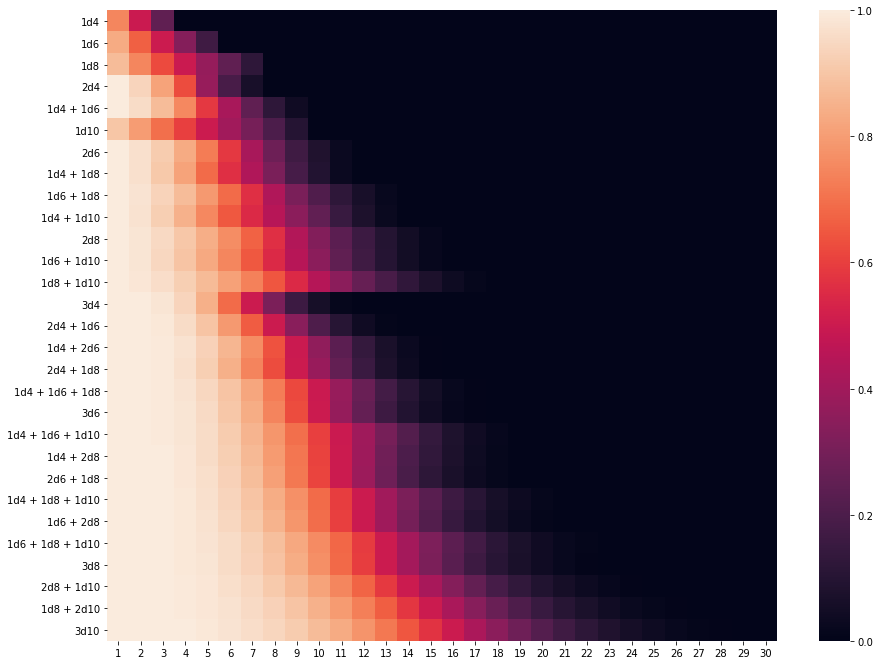

In [19]:


M = np.zeros((len(rolls), max_difficulty - min_difficulty + 1))
for j, difficulty in enumerate(difficulty_levels):
    for i, (label, roll) in enumerate(rolls):
        R = roll
        wins = (R.sum() > difficulty).sum().sum()
        pʹ = wins / k
        M[i, j] = pʹ
            
with pd.option_context('max_columns', None, 'display.float_format', '{:0,.2f}'.format):
    scaling_factor = .4
    fig, ax = plt.subplots(figsize=(max_difficulty * scaling_factor + 3, len(rolls) * scaling_factor))
    df = pd.DataFrame(M)
    df.index = [r[0] for r in rolls]
    df.columns = difficulty_levels
    sns.heatmap(df, ax=ax)
    display(df)
    display(df.apply(meaningful_range, axis=1))

### Probability Of An Exact Roll

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1d4,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6,0.16,0.17,0.17,0.17,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d8,0.12,0.13,0.13,0.12,0.12,0.13,0.13,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d4,0.00,0.06,0.13,0.19,0.25,0.19,0.13,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d6,0.00,0.04,0.08,0.13,0.17,0.17,0.16,0.13,0.08,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d6,0.00,0.03,0.05,0.08,0.11,0.14,0.17,0.14,0.11,0.08,0.06,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d8,0.00,0.03,0.06,0.09,0.12,0.13,0.13,0.12,0.13,0.09,0.06,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6 + 1d8,0.00,0.02,0.04,0.06,0.08,0.10,0.13,0.13,0.12,0.11,0.08,0.06,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d10,0.00,0.02,0.05,0.08,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.07,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


1d4                  4 (1 - 5) max: 4
1d6                  6 (1 - 7) max: 6
1d8                  8 (1 - 9) max: 8
2d4                  0 (1 - 1) max: 0
1d4 + 1d6            0 (1 - 1) max: 0
1d10                0 (1 - 1) max: 10
2d6                  0 (1 - 1) max: 0
1d4 + 1d8            0 (1 - 1) max: 0
1d6 + 1d8            0 (1 - 1) max: 0
1d4 + 1d10           0 (1 - 1) max: 0
2d8                  0 (1 - 1) max: 0
1d6 + 1d10           0 (1 - 1) max: 0
1d8 + 1d10           0 (1 - 1) max: 0
3d4                  0 (1 - 1) max: 0
2d4 + 1d6            0 (1 - 1) max: 0
1d4 + 2d6            0 (1 - 1) max: 0
2d4 + 1d8            0 (1 - 1) max: 0
1d4 + 1d6 + 1d8      0 (1 - 1) max: 0
3d6                  0 (1 - 1) max: 0
1d4 + 1d6 + 1d10     0 (1 - 1) max: 0
1d4 + 2d8            0 (1 - 1) max: 0
2d6 + 1d8            0 (1 - 1) max: 0
1d4 + 1d8 + 1d10     0 (1 - 1) max: 0
1d6 + 2d8            0 (1 - 1) max: 0
1d6 + 1d8 + 1d10     0 (1 - 1) max: 0
3d8                  0 (1 - 1) max: 0
2d8 + 1d10  

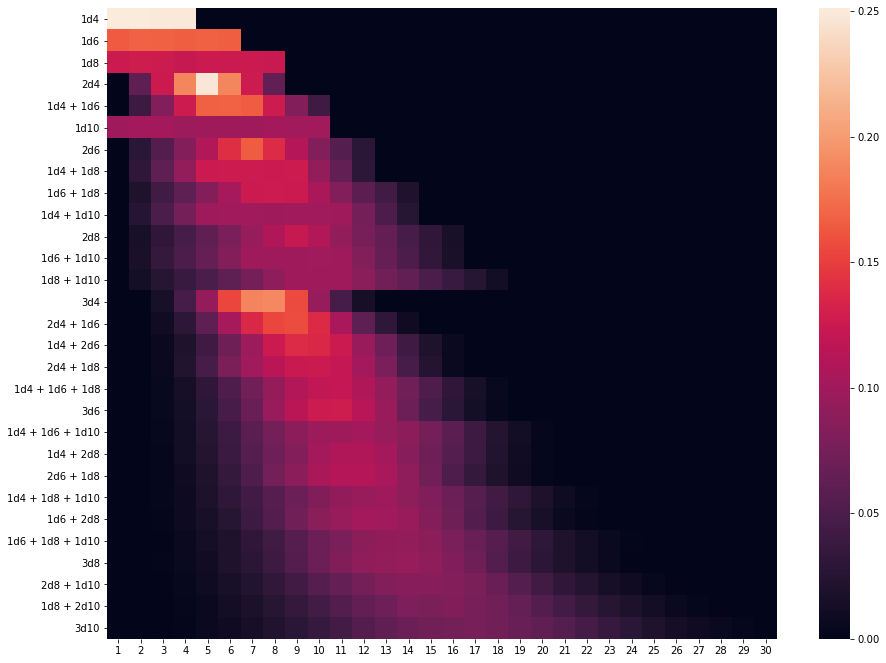

In [20]:


M = np.zeros((len(rolls), max_difficulty - min_difficulty + 1))
for j, difficulty in enumerate(difficulty_levels):
    for i, (label, roll) in enumerate(rolls):
        R = roll
        wins = (R.sum() == difficulty).sum().sum()
        pʹ = wins / k
        M[i, j] = pʹ
            
with pd.option_context('max_columns', None, 'display.float_format', '{:0,.2f}'.format):
    scaling_factor = .4
    fig, ax = plt.subplots(figsize=(max_difficulty * scaling_factor + 3, len(rolls) * scaling_factor))
    df = pd.DataFrame(M)
    df.index = [r[0] for r in rolls]
    df.columns = difficulty_levels
    sns.heatmap(df, ax=ax)
    display(df)
    display(df.apply(meaningful_range, axis=1))

### Success Probability with Automatic Failure

In [137]:
def parse_label(label):
    lst = []
    for roll in [s.strip(' ') for s in label.split('+')]:
        count, face = roll.split('d')
        lst += [(count, face)]
    return lst

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1d4,0.75,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6,0.84,0.67,0.50,0.34,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d8,0.88,0.75,0.62,0.50,0.38,0.25,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d4,0.94,0.94,0.81,0.63,0.38,0.19,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d6,0.96,0.96,0.87,0.75,0.58,0.41,0.25,0.13,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d6,0.97,0.97,0.92,0.83,0.72,0.58,0.42,0.28,0.17,0.08,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d8,0.97,0.97,0.91,0.81,0.69,0.56,0.44,0.31,0.19,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d6 + 1d8,0.98,0.98,0.94,0.88,0.79,0.69,0.56,0.44,0.31,0.21,0.12,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1d4 + 1d10,0.98,0.98,0.92,0.85,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2d8,0.98,0.98,0.95,0.91,0.84,0.77,0.67,0.56,0.44,0.33,0.23,0.16,0.09,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


1d4                    3 (1 - 4) max: 3 median: nan
1d6                    5 (1 - 6) max: 5 median: nan
1d8                    7 (1 - 8) max: 7 median: nan
2d4                    5 (2 - 7) max: 7 median: nan
1d4 + 1d6              7 (2 - 9) max: 9 median: nan
2d6                  7 (3 - 10) max: 11 median: nan
1d4 + 1d8            7 (3 - 10) max: 11 median: nan
1d6 + 1d8            9 (3 - 12) max: 13 median: nan
1d4 + 1d10           9 (3 - 12) max: 13 median: nan
2d8                  9 (4 - 13) max: 15 median: nan
1d6 + 1d10          10 (4 - 14) max: 15 median: nan
1d8 + 1d10          11 (4 - 15) max: 17 median: nan
3d4                  9 (1 - 10) max: 11 median: nan
2d4 + 1d6           11 (1 - 12) max: 13 median: nan
1d4 + 2d6            9 (4 - 13) max: 15 median: nan
2d4 + 1d8           12 (1 - 13) max: 15 median: nan
1d4 + 1d6 + 1d8     10 (5 - 15) max: 17 median: nan
3d6                  9 (5 - 14) max: 17 median: nan
1d4 + 1d6 + 1d10    11 (5 - 16) max: 19 median: nan
1d4 + 2d8   

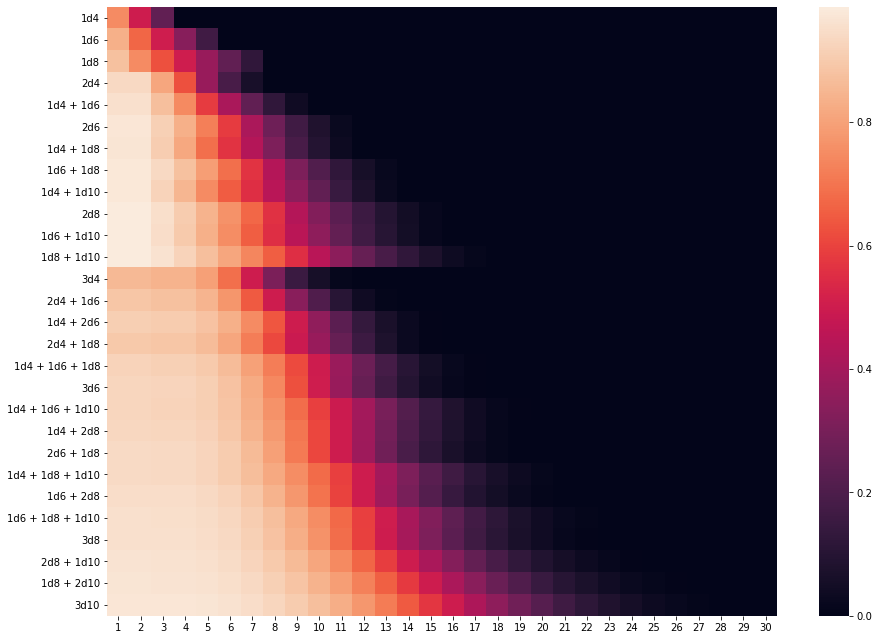

In [134]:


M = np.zeros((len(rolls), max_difficulty - min_difficulty + 1))
for j, difficulty in enumerate(difficulty_levels):
    for i, (label, roll) in enumerate(rolls):
        R = roll
        wins = (((R.result == 1).sum(axis=0) != 2) & (R.sum() > difficulty)).sum().sum()
        pʹ = wins / k
        M[i, j] = pʹ
            
with pd.option_context('max_columns', None, 'display.float_format', '{:0,.2f}'.format):
    scaling_factor = .4
    fig, ax = plt.subplots(figsize=(max_difficulty * scaling_factor + 3, len(rolls) * scaling_factor))
    df = pd.DataFrame(M)
    df.index = [r[0] for r in rolls]
    df.columns = difficulty_levels
    sns.heatmap(df, ax=ax)
    display(df)
    display(df.apply(meaningful_range, axis=1))

### Double-One Probability

,Double 1,Triple 1
3d4,0.14,0.02
2d4 + 1d6,0.11,0.01
1d4 + 2d6,0.09,0.01
2d4 + 1d8,0.10,0.01
1d4 + 1d6 + 1d8,0.08,0.00
3d6,0.07,0.00
1d4 + 1d6 + 1d10,0.07,0.00
1d4 + 2d8,0.07,0.00
2d6 + 1d8,0.06,0.00
1d4 + 1d8 + 1d10,0.06,0.00


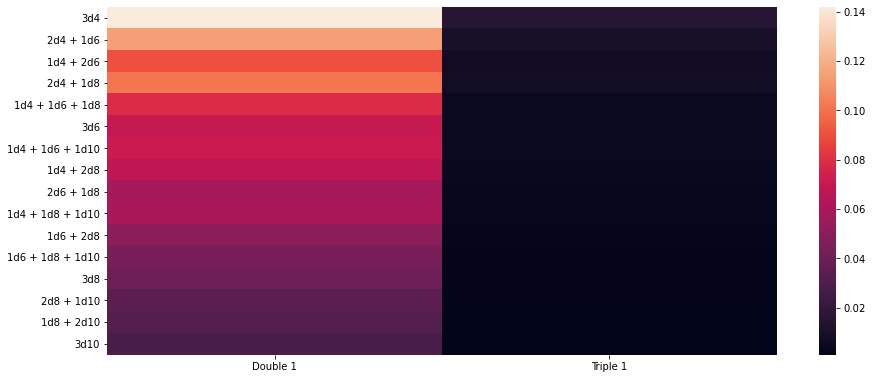

In [29]:


M = np.zeros((len(rolls), 2))
for i, (label, roll) in enumerate(rolls):
    R = roll
    double_one_count = ((R.result == 1).sum(axis=0) == 2).sum()
    pʹ = double_one_count / k
    M[i, 0] = pʹ
    triple_one_count = ((R.result == 1).sum(axis=0) == 3).sum()
    pʹ = triple_one_count / k
    M[i, 1] = pʹ
            
with pd.option_context('max_columns', None, 'display.float_format', '{:0,.2f}'.format):
    scaling_factor = .4
    fig, ax = plt.subplots(figsize=(max_difficulty * scaling_factor + 3, len(rolls) * scaling_factor))
    df = pd.DataFrame(M)
    df.index = [r[0] for r in rolls]
    df.columns = ['Double 1', 'Triple 1']
    sns.heatmap(df, ax=ax)
    display(df)


In [89]:
cursed_rolls = [
    ('4d4',                (k, 4) * d4),
    ('3d4 + 1d6',          (k, 3) * d4 + (k, 1) * d6),
    ('2d4 + 2d6',          (k, 2) * d4 + (k, 2) * d6),
    ('1d4 + 3d6',          (k, 1) * d4 + (k, 3) * d6),
    ('3d4 + 1d8',          (k, 3) * d4 + (k, 1) * d8),
    ('2d4 + 1d6 + 1d8',    (k, 2) * d4 + (k, 1) * d6 + (k, 1) * d8),
    ('4d6',                (k, 4) * d6),
    ('2d4 + 1d6 + 1d10',   (k, 2) * d4 + (k, 1) * d6 + (k, 1) * d10),
    ('2d4 + 2d8',          (k, 2) * d4 + (k, 2) * d8),
    ('1d4 + 3d8',          (k, 1) * d4 + (k, 3) * d8),
    ('2d6 + 2d8',          (k, 2) * d6 + (k, 2) * d8),
    ('1d4 + 2d8 + 1d10',   (k, 1) * d4 + (k, 2) * d8 + (k, 1) * d10),
    ('1d6 + 3d8',          (k, 1) * d6 + (k, 3) * d8),
    ('1d6 + 2d8 + 1d10',   (k, 1) * d6 + (k, 2) * d8 + (k, 1) * d10),
    ('4d8',                (k, 4) * d8),
    ('3d8 + 1d10',         (k, 3) * d8 + (k, 1) * d10),
    ('2d8 + 2d10',         (k, 2) * d8 + (k, 2) * d10),
    ('1d8 + 3d10',         (k, 1) * d8 + (k, 3) * d10),
    ('3d10',               (k, 3) * d10),
]

,Double 1,Triple 1
4d4,0.21,0.05
3d4 + 1d6,0.19,0.04
2d4 + 2d6,0.16,0.03
1d4 + 3d6,0.14,0.02
3d4 + 1d8,0.18,0.03
2d4 + 1d6 + 1d8,0.15,0.02
4d6,0.12,0.02
2d4 + 1d6 + 1d10,0.15,0.02
2d4 + 2d8,0.14,0.02
1d4 + 3d8,0.10,0.01


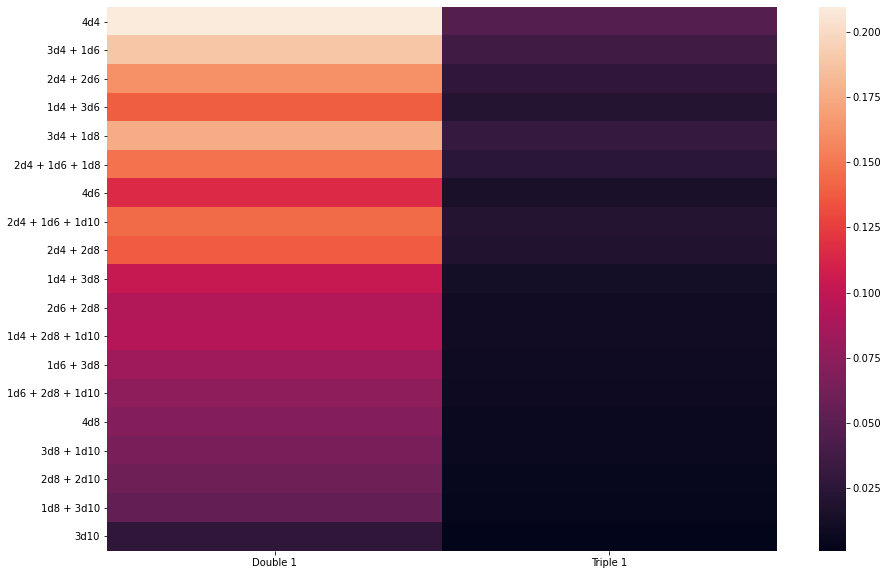

In [90]:


M = np.zeros((len(cursed_rolls), 2))
for i, (label, roll) in enumerate(cursed_rolls):
    R = roll
    double_one_count = ((R.result == 1).sum(axis=0) == 2).sum()
    pʹ = double_one_count / k
    M[i, 0] = pʹ
    triple_one_count = ((R.result == 1).sum(axis=0) == 3).sum()
    pʹ = triple_one_count / k
    M[i, 1] = pʹ
            
with pd.option_context('max_columns', None, 'display.float_format', '{:0,.2f}'.format):
    scaling_factor = .4
    fig, ax = plt.subplots(figsize=(max_difficulty * scaling_factor + 3, len(rolls) * scaling_factor))
    df = pd.DataFrame(M)
    df.index = [r[0] for r in cursed_rolls]
    df.columns = ['Double 1', 'Triple 1']
    sns.heatmap(df, ax=ax)
    display(df)
